# KNN for classification problems
Scikit-learn (formerly scikits. learn and also known as sklearn) is a free software machine learning library for the Python programming language. In this project, we will use the machine learning model(k-Nearest Neighbors algorithm) to predict the diabetes patients using the "Pima Indians Diabetes" dataset.

## Data Description
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Attribute  Informations:
Pregnancies - Number of times pregnant(0 - 17)
<br>
Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
<br>
BloodPressure - Diastolic blood pressure (mm Hg)
<br>
SkinThickness - Triceps skin fold thickness (mm)
<br>
Insulin - 2-Hour serum insulin (mu U/ml)
<br>
BMI - Body mass index (weight in kg/(height in m)^2)
<br>
DiabetesPedigreeFunction - Diabetes pedigree function
<br>
Age - Age (years)
<br>
Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0

## References
...


In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

### Importing the data

In [2]:
df = pd.read_csv(r'C:\Users\fjiac\Desktop\diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

### Reviewing the data

In [3]:
# Print the first 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Observe the shape of the dataframe
df.shape

(768, 9)

In [5]:
# Print the columns of the data
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# summary of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Observe the datatype of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Checking if there is any null data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Spliting the data
Let's split the data randomly into training and test set.
<br>
The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function.

In [9]:
# We create a numpy arrays for features and target
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

### Choose the K-value
We will find the optimal K-value using these three method.
<br>
#### Method 1 (Find the smallest MSE)
Let's find out the optimal hyperparameter value, k using the hyperparameter optimization technique.

To prevent one single column from having too much impact on the distance, we normalize all the columns.

In [10]:
normalized_X = (X - X.mean()) / X.std()
normalized_X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.977942e-17,-4.192248e-18,-7.083454e-18,3.050222e-17,1.850372e-17,2.966016e-15,1.913039e-15,2.198762e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.141108e+00,-3.781190e+00,-3.570271e+00,-1.287373e+00,-6.924393e-01,-4.057829e+00,-1.188778e+00,-1.040871e+00
25%,-8.443348e-01,-6.847901e-01,-3.670975e-01,-1.287373e+00,-6.924393e-01,-5.951906e-01,-6.885198e-01,-7.857741e-01
50%,-2.507887e-01,-1.218083e-01,1.495433e-01,1.544326e-01,-4.277835e-01,9.413653e-04,-2.999328e-01,-3.606124e-01
75%,6.395305e-01,6.053764e-01,5.628560e-01,7.186174e-01,4.117396e-01,5.843897e-01,4.659233e-01,6.597757e-01
max,3.904034e+00,2.442886e+00,2.732747e+00,4.918660e+00,6.648507e+00,4.452906e+00,5.879733e+00,4.061069e+00


Then we split the data.
<br>
Also we create a test set of size of about 40% of the dataset.

In [11]:
normalized_X_train, normalized_X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.4, random_state = 2, stratify=y)

In [12]:
# Expand the grid search all the way to k value of 10
hyper_params = [i for i in range(1, 11)]
mse_values = list()

In [13]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')
    knn.fit(normalized_X_train, y_train)
    predictions = knn.predict(normalized_X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_values.append(mse)

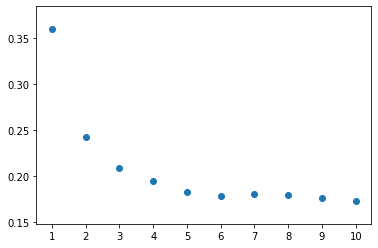

In [14]:
plt.scatter(hyper_params, mse_values)
plt.xticks(range(1, 11))
plt.show()

Evaluate the model accuracy and find out the best model (with the least MSE).

In [15]:
# Initialize the lowest mse and k 
lowest_mse = mse_values[0]
lowest_k = 1
# Create a dictionary to store the best model
hyp_mse = dict()

In [16]:
for k, mse in enumerate(mse_values, start = 1):
    if mse < lowest_mse:
        lowest_mse = mse
        lowest_k = k
        
hyp_mse[lowest_k] = lowest_mse

In [17]:
print(hyp_mse)

{10: 0.17272727272727273}


### Comment on method 1
From the scatter plot, you can tell that the lowest MSE value was achieved at the k value of 10. Since increasing the k value decreased the MSE value, so if we keep repeating the grid search process, we might found that having the lowest MSE value is not fixed at k = 10 but with higher k value. But for this case, we assumed the maximum k value here is 10.

#### Method 2 (Find the accuracy and K-value)

Again, we split the data using the train_test_split function.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2, stratify=y)

In [31]:
error_rate = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.2435064935064935 at K =  7


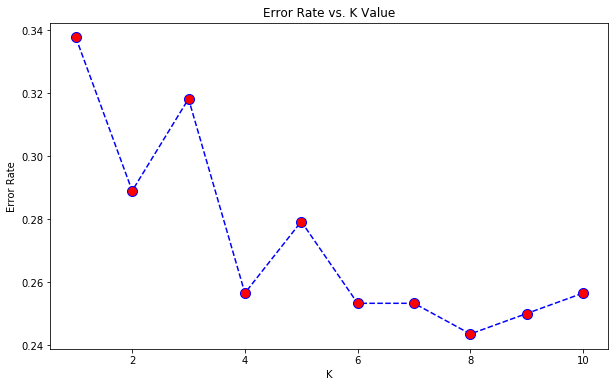

In [32]:
# Plot the figure
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-", min(error_rate),"at K = ", error_rate.index(min(error_rate)))

In [21]:
acc = []

from sklearn import metrics 
for i in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.7564935064935064 at K =  7


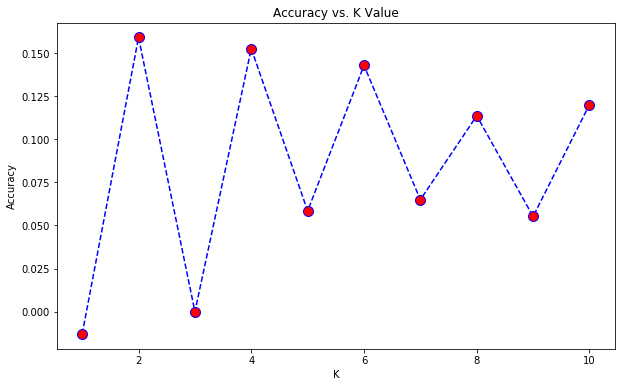

In [22]:
# Plot the figure
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-", max(acc),"at K = ", acc.index(max(acc)))

### Comment on method 2
We can observe above that we get the maximum testing accuracy for k=7.

### Evaluating the KNN model
Now using the 2 methods, we can use either k = 10 or 7, to find the best model, we check the accuracy.

In [34]:
# Setup the knn classifier with k neighbors
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_10 = KNeighborsClassifier(n_neighbors=10)

In [35]:
# Fit the models
knn_7.fit(X_train, y_train)
knn_10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [38]:
# Get accuracy. Note: In the case of classification algorithms score method represents accuracy.
# When k = 7
knn_7.score(X_test, y_test)

0.7467532467532467

In [39]:
# When k = 10
knn_10.score(X_test, y_test)

0.7435064935064936

It does not make much changes, therefore we consider the higher model that generate slightly higher accuracy which is KNN with k = 7.

#### Confusion matrix (Refer to https://towardsdatascience.com/evaluating-machine-learning-classification-problems-in-python-5-1-metrics-that-matter-792c6faddf5)
The confusion matrix(or contigency table) is a matix or table that summarises the number of correct and incorrect classification.
<br>
<br>
For a classification problem with binary outcomes(with 2 classes), positive(+) and negative(-), the confusion matrix can be presented as follows. 
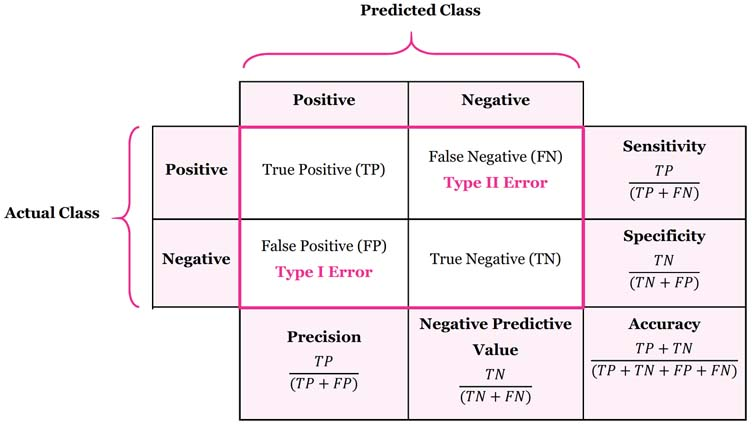


In [45]:
# use the prediction that we generated above
y_pred = knn_7.predict(X_test)

In [54]:
# generate confusion matrix
confusion_matrix(y_test,y_pred)
# or using pandas crosstab method
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
# generate classification report
print(classification_report(y_test, y_pred))

Predicted    0   1  All
True                   
0          172  29  201
1           49  58  107
All        221  87  308
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       201
           1       0.67      0.54      0.60       107

    accuracy                           0.75       308
   macro avg       0.72      0.70      0.71       308
weighted avg       0.74      0.75      0.74       308



#### Classification report
The classification report is about key metrics in a classification problem. In the report, we have precision, recall, f1-score and support for each class we found. 
<br>
<br>
**Recall** means "how many of this class you find over the whole number of element of this class".
<br>
**Precision** means "how many are correctly classified among that class".
<br>
**f1-score** means the harmonic mean between the precision and recall.
<br>
**Support** means the number of occurence of the given class.(In this case, we have 201 in class 0 and 107 in class 1, which is not really a well balanced dataset.)

#### Confusion matrix
There are many metrics for evaluating the confusion matrix, but these are more widely to used for evaluating the model.
<br>
<br>
**Accuracy** is the proportion of correct predictions over the total number of predictions.
<br>
Formula: Accuracy = (TP + TN) / All Predictions
<br>
**Mis-Classification** is (1-Accuracy), and means all false predictions over the total number of predictions.
<br>
**Sensitivity** (aka Positive Recall) means “out of all actual Positives, how many did we predict as Positive”.
<br>
Formula: Sensitivity (Recall) = TP / (FN + TP)
<br>
**Specificity** (aka Negative Recall or True Negative Rate, TNR) means “out of all actual Negatives, how many did we predict as Negative”
<br>
Formula: Specificity = TN / (TN + FP)
<br>
**Precision** (aka Positive Predictive Value, PPV) means “out of all predicted Positive cases, how many were actually Positive”
<br>
Formula: Precision = TP / (TP + FP)
<br>
**F1 Score** is the harmonic, or weighted, an average of Precision and Sensitivity, and is a widely used measure of accuracy for classification problems.
<br>
Formula: F1 Score = 2 * (Precision * Sensitivity) / (Precision + Sensitivity)

In [28]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

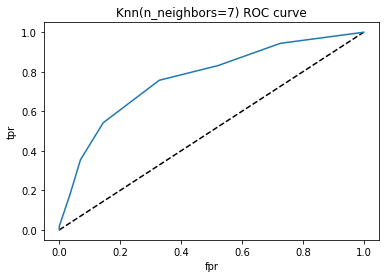

In [30]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()